In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
test=pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [5]:
sample=pd.read_csv("../input/health-insurance-cross-sell-prediction/sample_submission.csv")
sample

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
train_data= pd.get_dummies(train)
train_data

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0,0,1,1,0,0,1,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0,0,1,0,1,0,1,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0,0,1,0,1,0,1,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0,1,0,0,0,1,0,1


In [9]:
test_data=pd.get_dummies(test)
test_data

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,381110,25,1,11.0,1,35786.0,152.0,53,0,1,0,1,0,1,0
1,381111,40,1,28.0,0,33762.0,7.0,111,0,1,1,0,0,0,1
2,381112,47,1,28.0,0,40050.0,124.0,199,0,1,1,0,0,0,1
3,381113,24,1,27.0,1,37356.0,152.0,187,0,1,0,1,0,0,1
4,381114,27,1,28.0,1,59097.0,152.0,297,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,30867.0,152.0,56,1,0,0,1,0,1,0
127033,508143,38,1,28.0,0,28700.0,122.0,165,1,0,1,0,0,0,1
127034,508144,21,1,46.0,1,29802.0,152.0,74,0,1,0,1,0,1,0
127035,508145,71,1,28.0,1,62875.0,26.0,265,0,1,1,0,0,1,0


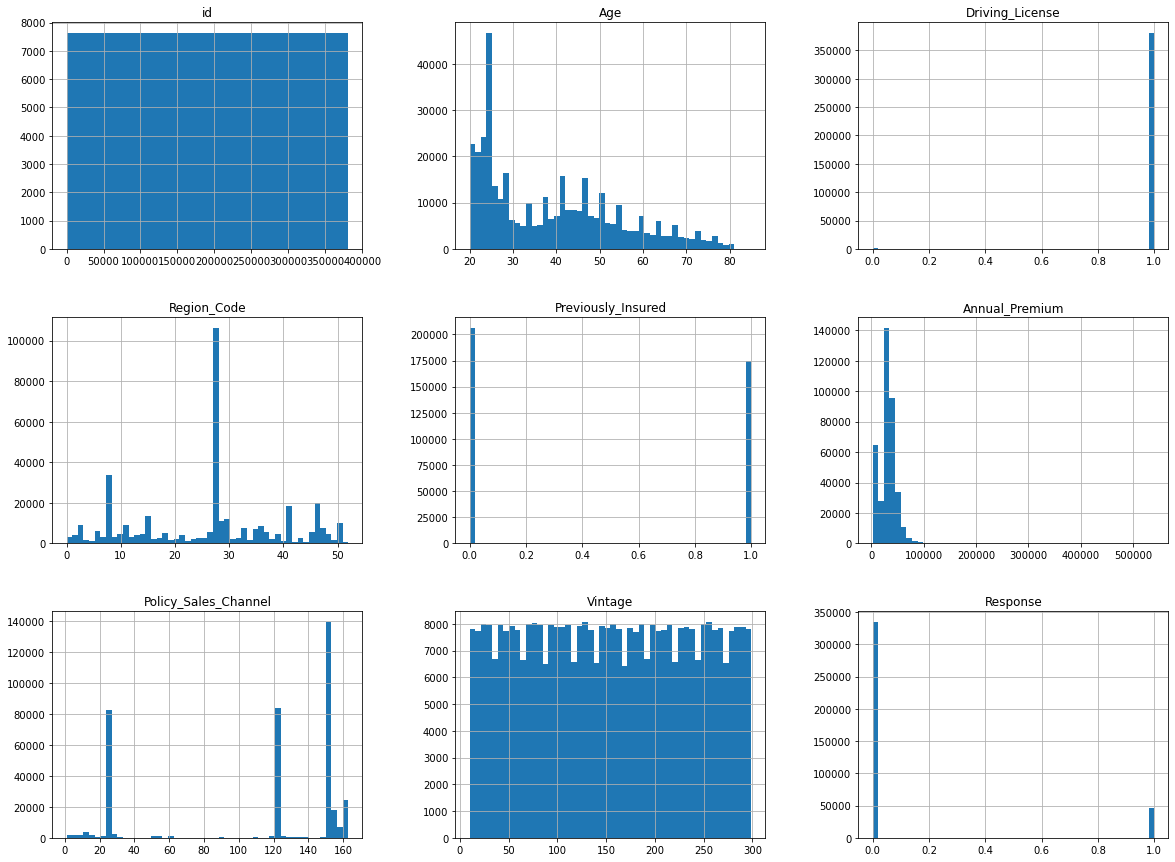

In [10]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import  Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier


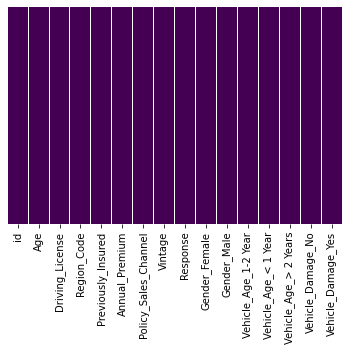

In [12]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

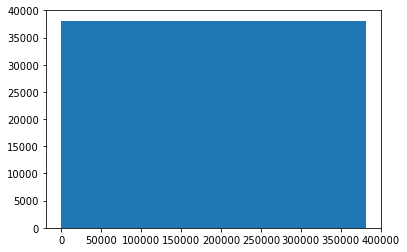

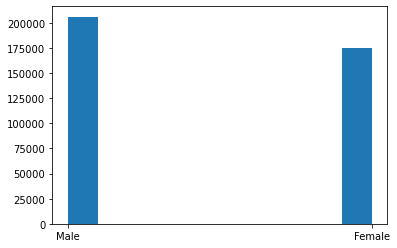

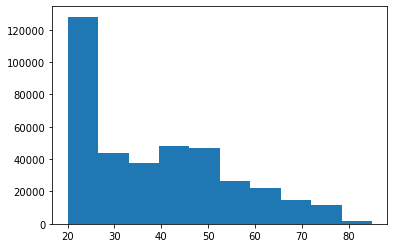

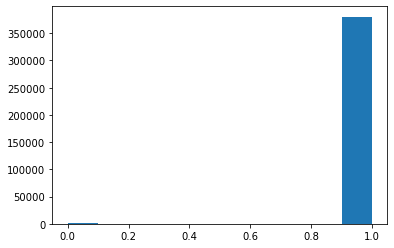

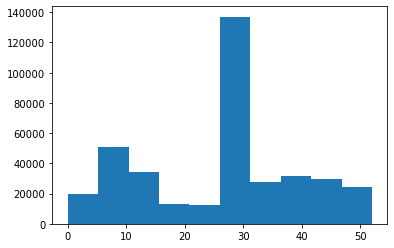

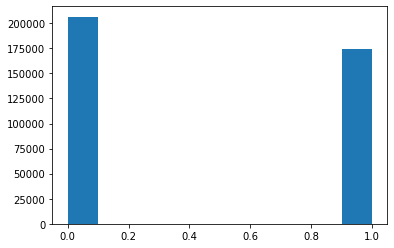

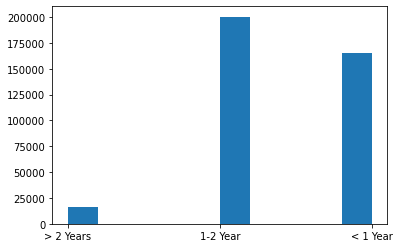

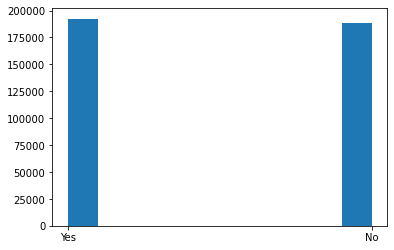

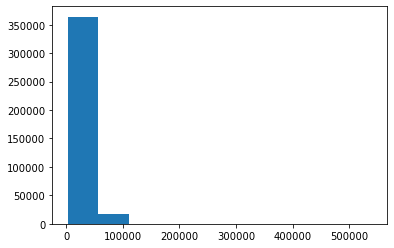

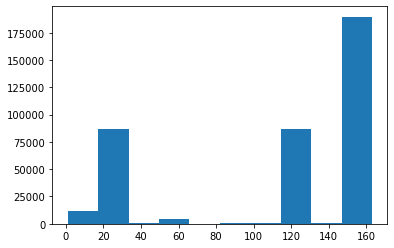

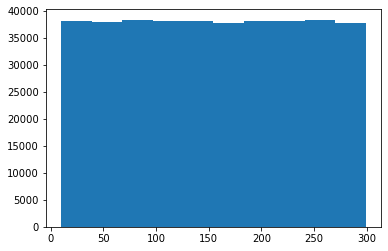

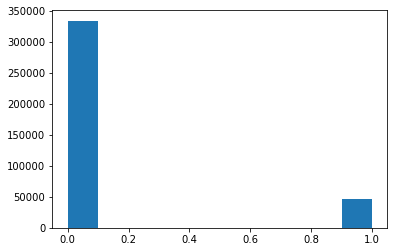

In [13]:
for i in train.columns:
    plt.figure()
    plt.hist(train[i])

In [14]:
train_data.dropna(axis=0, subset=['Response'], inplace=True)
val = train_data["Response"]
train_data.drop(['Response'], axis=1, inplace=True)

In [15]:
x_train, x_test, y_train, y_test= train_test_split(train_data, val, test_size=0.25, random_state=42)
x_train

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
247288,247289,21,1,46.0,1,24534.0,152.0,202,0,1,0,1,0,1,0
88242,88243,75,1,28.0,1,251853.0,124.0,85,1,0,1,0,0,0,1
312678,312679,51,1,28.0,0,69601.0,124.0,153,0,1,1,0,0,0,1
218264,218265,22,1,29.0,1,39573.0,152.0,44,0,1,0,1,0,1,0
88838,88839,23,1,21.0,1,27423.0,152.0,208,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259179,24,1,36.0,1,22575.0,152.0,287,1,0,0,1,0,1,0
365838,365839,56,1,35.0,0,41287.0,124.0,298,0,1,1,0,0,0,1
131932,131933,22,1,2.0,0,18857.0,152.0,76,1,0,0,1,0,0,1
146867,146868,44,1,32.0,1,2630.0,156.0,51,0,1,1,0,0,0,1


In [16]:
Grad1=GradientBoostingRegressor(learning_rate=0.5,criterion='mse',n_estimators=200,
                               max_depth=6, random_state=42, verbose=1)
model1= Grad1.fit(x_train, y_train)
prediction1=model1.predict(x_test)
model1.score(x_test, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0931            3.71m
         2           0.0893            3.69m
         3           0.0878            3.72m
         4           0.0872            3.71m
         5           0.0868            3.69m
         6           0.0867            3.66m
         7           0.0865            3.67m
         8           0.0863            3.66m
         9           0.0862            3.65m
        10           0.0860            3.62m
        20           0.0851            3.47m
        30           0.0844            3.29m
        40           0.0837            3.11m
        50           0.0831            2.93m
        60           0.0825            2.73m
        70           0.0820            2.53m
        80           0.0815            2.34m
        90           0.0809            2.14m
       100           0.0805            1.95m
       200           0.0752            0.00s


0.16548065787938426

In [17]:
Grad2=GradientBoostingClassifier(learning_rate=0.3,criterion='mse',n_estimators=200,
                               max_depth=6, random_state=10, verbose=1)
model2= Grad2.fit(x_train, y_train)
prediction2=model2.predict(x_test)
model2.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           0.6534            3.91m
         2           0.6126            3.84m
         3           0.5877            3.79m
         4           0.5711            3.78m
         5           0.5596            3.76m
         6           0.5516            3.74m
         7           0.5451            3.73m
         8           0.5403            3.71m
         9           0.5363            3.71m
        10           0.5335            3.70m
        20           0.5231            3.53m
        30           0.5192            3.38m
        40           0.5153            3.21m
        50           0.5128            3.00m
        60           0.5096            2.80m
        70           0.5071            2.60m
        80           0.5045            2.40m
        90           0.5058            2.20m
       100           0.5017            2.00m
       200           0.4770            0.00s


0.8746090388127374

In [18]:
reg= RandomForestRegressor(n_estimators=500, max_depth=6,
                          random_state=42, verbose=1)
model3= reg.fit(x_train, y_train)
prediction3=model3.predict(x_test)
model3.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished


0.18320192782283917

In [19]:
fclass= RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6,
                          random_state=42, verbose=1)
model4= fclass.fit(x_train, y_train)
prediction4=model4.predict(x_test)
model4.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished


0.8765192384390941

In [20]:


from sklearn.linear_model import  Ridge, Lasso
ridge = Ridge(alpha = 1.5)  # sets alpha to a default value as baseline  
model5=ridge.fit(x_train, y_train)
prediction5=model5.predict(x_test)
model5.score(x_test, y_test)




0.15041329333837916

In [21]:
lasso= Lasso(alpha = .001)  # sets alpha to a default value as baseline  
model6= lasso.fit(x_train, y_train)
prediction6=model6.predict(x_test)
model6.score(x_test, y_test)

0.1496891082617945

In [22]:
final_prediction= model2.predict(test_data)
final_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [23]:

print ('MSE is: \n', mean_squared_error(y_test, prediction1))
print ('MAE is: \n', mean_absolute_error(y_test, prediction1))

MSE is: 
 0.09032275150546593
MAE is: 
 0.18224492063496656


In [24]:
output = pd.DataFrame({'id': test_data['id'],
                       'Response': final_prediction})
output
output.to_csv('submission.csv', index=False)

In [25]:
sub= pd.read_csv('submission.csv')
sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0
